In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [4]:
data=pd.read_csv(r"C:\Users\sheba\Downloads\crop_yield.csv (1).zip")
data

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [5]:
data.shape

(19689, 10)

In [6]:
data.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [7]:
data.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.0,392160,1356.2,22778368.48,74196.64,1.261818


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [9]:
data.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [10]:
data.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

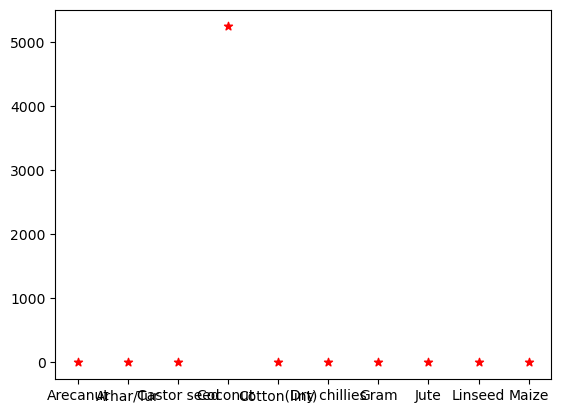

In [11]:
x=data['Crop'].head(10)
y=data['Yield'].head(10)
plt.scatter(x,y,c='red',marker='*')

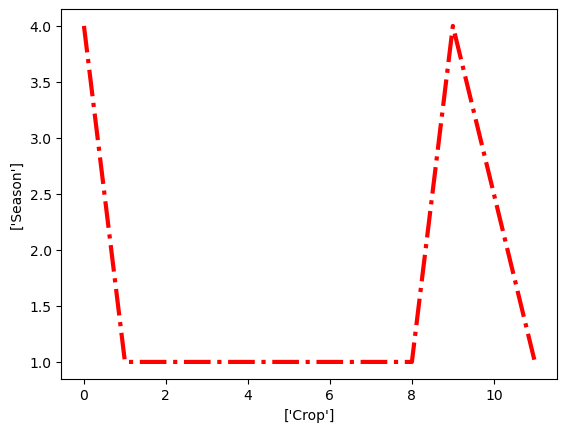

In [83]:
x=data['Crop'].head(5)
y=data['Season'].head(5)
plt.xlabel(['Crop'])
plt.ylabel(['Season'])
plt.plot(x,y,c='red',lw='3',ls='-.')

In [12]:
ob1=LabelEncoder()
ob2=LabelEncoder()
ob3=LabelEncoder()

In [13]:
data["Crop"]=ob1.fit_transform(data["Crop"])
data["Season"]=ob2.fit_transform(data["Season"])
data["State"]=ob3.fit_transform(data["State"])
data

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,1997,4,2,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,1,1997,1,2,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,8,1997,1,2,796.0,22,2051.4,75755.32,246.76,0.238333
3,9,1997,4,2,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,11,1997,1,2,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,44,1998,1,19,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,53,1998,2,19,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,24,1997,1,10,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,40,1997,1,10,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [14]:
data.drop(["Fertilizer","Pesticide"],axis=1,inplace=True)
data

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Yield
0,0,1997,4,2,73814.0,56708,2051.4,0.796087
1,1,1997,1,2,6637.0,4685,2051.4,0.710435
2,8,1997,1,2,796.0,22,2051.4,0.238333
3,9,1997,4,2,19656.0,126905000,2051.4,5238.051739
4,11,1997,1,2,1739.0,794,2051.4,0.420909
...,...,...,...,...,...,...,...,...
19684,44,1998,1,19,4000.0,2000,1498.0,0.500000
19685,53,1998,2,19,1000.0,3000,1498.0,3.000000
19686,24,1997,1,10,310883.0,440900,1356.2,1.285000
19687,40,1997,1,10,275746.0,5488,1356.2,0.016667


In [15]:
data.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Yield
0,0,1997,4,2,73814.0,56708,2051.4,0.796087
1,1,1997,1,2,6637.0,4685,2051.4,0.710435
2,8,1997,1,2,796.0,22,2051.4,0.238333
3,9,1997,4,2,19656.0,126905000,2051.4,5238.051739
4,11,1997,1,2,1739.0,794,2051.4,0.420909


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  int32  
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  int32  
 3   State            19689 non-null  int32  
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Yield            19689 non-null  float64
dtypes: float64(3), int32(3), int64(2)
memory usage: 1000.0 KB


In [17]:
data.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Yield              0
dtype: int64

In [18]:
data.corr()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Yield
Crop,1.000000,0.010933,0.037492,0.038587,0.071105,-0.075893,0.033462,-0.110894
Crop_Year,0.010933,1.000000,-0.053790,0.035491,-0.035686,0.003366,-0.011187,0.002539
Season,0.037492,-0.053790,1.000000,-0.036625,-0.031369,0.096856,0.099357,0.141791
State,0.038587,0.035491,-0.036625,1.000000,0.026989,0.003917,0.083953,0.009668
Area,0.071105,-0.035686,-0.031369,0.026989,1.000000,0.037441,-0.106054,0.001858
Production,-0.075893,0.003366,0.096856,0.003917,0.037441,1.000000,0.029879,0.570809
Annual_Rainfall,0.033462,-0.011187,0.099357,0.083953,-0.106054,0.029879,1.000000,0.020761
Yield,-0.110894,0.002539,0.141791,0.009668,0.001858,0.570809,0.020761,1.000000


In [19]:
data.dtypes

Crop                 int32
Crop_Year            int64
Season               int32
State                int32
Area               float64
Production           int64
Annual_Rainfall    float64
Yield              float64
dtype: object

In [20]:
data.shape

(19689, 8)

In [21]:
x=data.drop("Yield",axis="columns")
x

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall
0,0,1997,4,2,73814.0,56708,2051.4
1,1,1997,1,2,6637.0,4685,2051.4
2,8,1997,1,2,796.0,22,2051.4
3,9,1997,4,2,19656.0,126905000,2051.4
4,11,1997,1,2,1739.0,794,2051.4
...,...,...,...,...,...,...,...
19684,44,1998,1,19,4000.0,2000,1498.0
19685,53,1998,2,19,1000.0,3000,1498.0
19686,24,1997,1,10,310883.0,440900,1356.2
19687,40,1997,1,10,275746.0,5488,1356.2


In [22]:
y=data.Yield
y

0           0.796087
1           0.710435
2           0.238333
3        5238.051739
4           0.420909
            ...     
19684       0.500000
19685       3.000000
19686       1.285000
19687       0.016667
19688       1.261818
Name: Yield, Length: 19689, dtype: float64

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
x_test

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall
18238,36,2016,1,10,210.00,1010,902.8
6918,24,1999,2,20,8270.00,10280,1484.3
4894,37,2016,5,17,6341.00,44026,3837.1
10960,38,2008,0,11,29768.73,27189,1295.2
15615,8,2017,1,14,8950.00,4970,800.0
...,...,...,...,...,...,...,...
15420,32,2017,2,3,1419.00,1426,1112.0
5575,25,2018,2,17,1258.00,1393,5649.1
4560,39,2015,2,17,9786.00,9466,3870.8
6775,20,1999,1,12,410175.00,556455,1203.8


In [25]:
y_test

18238    3.820000
6918     1.395357
4894     6.522727
10960    0.812857
15615    0.508000
           ...   
15420    1.002857
5575     1.321429
4560     0.953636
6775     1.302857
16746    0.412857
Name: Yield, Length: 5907, dtype: float64

In [26]:
Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train) 
x_test=Scaler.transform(x_test)

In [27]:
1.#Linear regression

1.0

In [28]:
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [29]:
reg.predict([[0,1997,4,2,73814.0,56708,2051.4]])

array([269.56107624])

In [30]:
#multiple linear regression

In [31]:
model=LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))
print(model.score(x_train,y_train))

0.3731639758302888
0.3235052920560846


In [32]:
y_pred=model.predict(x_test)
y_pred

array([-51.69775638,  84.52554879, 216.57249569, ...,   2.38574288,
        15.93320226, -95.53110928])

In [33]:
model.predict([[36,2016,1,10,210.00,1010,902.8]])

array([471163.51488889])

In [34]:
print("y Intercept",model.intercept_)

y Intercept 81.54989467052766


In [35]:
print("coefficent",model.coef_)

coefficent [-6.69763696e+01 -2.91180826e-01  8.39554659e+01  1.63881710e+01
 -9.90493561e+00  4.74657255e+02 -3.86740494e+00]


In [36]:
r2=r2_score(y_test,y_pred)
r2

0.3731639758302888

In [37]:
#Decision tree regressor

In [38]:
model1=DecisionTreeRegressor()
model1.fit(x_train,y_train)


DecisionTreeRegressor()

In [39]:
model1.predict(x_test)

array([5.75666667, 1.3625    , 6.52636364, ..., 0.90272727, 1.3952381 ,
       0.48947368])

In [40]:
model1.predict([[38,2008,0,11,29768.73,27189,1295.2]])

array([68.77786667])

In [41]:
print(model1.score(x_test,y_test))

0.8121925207035596


In [42]:
model1.score(x_train,y_train)

1.0

In [43]:
#Random forest

In [44]:
model2=RandomForestRegressor(n_estimators=100)
model2.fit(x_train,y_train)
print(model2.score(x_test,y_test))
print(model2.score(x_train,y_train))

0.8207524561540865
0.9972859813806895


In [45]:
y_pred=model2.predict(x_test)
print(y_pred)

[4.66467541 1.25501284 6.55889655 ... 0.90824289 1.2168843  0.45024577]


In [47]:
print(model2.predict([[24,1999,2,20,8270.00,10280,1484.3]]))

[7337.6680267]


In [ ]:
#KNN algorithm

In [49]:
Regressor=KNeighborsRegressor(n_neighbors=5)
Regressor.fit(x_train,y_train)
print(Regressor.score(x_test,y_test))
print(Regressor.score(x_train,y_train))

0.7797967658995536
0.9319320662368406


In [51]:
ypred=Regressor.predict(x_test)

In [53]:
print(Regressor.predict([[36,2016,1,10,210.00,1010,902.8]]))

[6683.4982858]


In [55]:
df=pd.DataFrame({"Train_Accuracy":[32,100,99,90],"Test_Accuracy":[37,81,81,90]},index=['linear','Decision','random forest','k-neighbour'])
df

,Train_Accuracy,Test_Accuracy
linear,32,37
Decision,100,81
random forest,99,81
k-neighbour,90,90


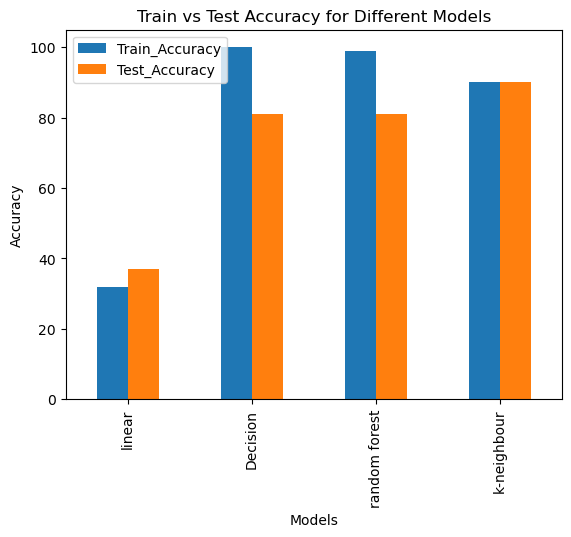

In [57]:
df.plot(kind='bar')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Different Models')
plt.show()

In [59]:
Crop=int(input("enter the Crop"))
Crop=ob1.fit_transform([Crop])
Crop

enter the Crop 36


array([0], dtype=int64)

In [61]:
Season=input("enter the Season")
Season=ob2.fit_transform([Season])
Season

enter the Season 1


array([0], dtype=int64)

In [63]:
State=input("enter the State")
State=ob3.fit_transform([State])
State

enter the State 10


array([0], dtype=int64)

In [65]:
Crop_Year=int(input("enter the Year"))
Production=int(input("enter the Production"))
Annual_Rainfall=float(input("enter the Annual_Rainfall"))
Area=float(input("enter the Area"))


enter the Year 2016
enter the Production 1010
enter the Annual_Rainfall 902.8
enter the Area 210.00


In [91]:
print(model1.predict([[Crop[0],Season[0],State[0],Crop_Year,Production,Annual_Rainfall,Area,]]))

[68.77786667]


In [ ]:
#crop:36,year:2016,season:1,state:10,area:210.00,production:1010,annual_rainfall:902.8